# 12. L1-регуляризатор. Отличия между L1- и L2-регуляризаторами

[-9.63189310e-06 -8.62643026e-06  6.39536811e-02 -3.28762643e-02
  5.38708383e-04]
0.039439875505453706


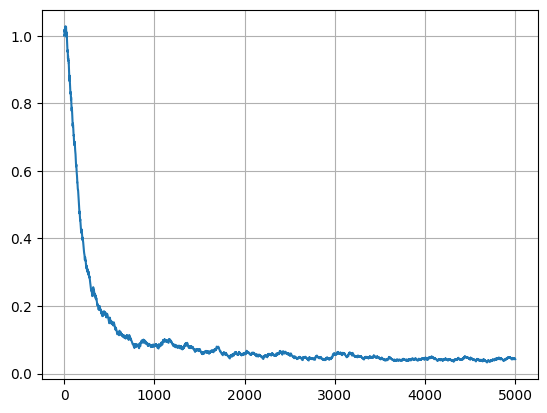

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# сигмоидная функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

# производная сигмоидной функции потерь по вектору w
def df(w, x, y):
    L1 = 1.0
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y + L1 * np.sign(w)

# обучающая выборка с тремя признаками (третий - константа +1)
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [10*x[0], 10*x[1], 5*(x[0]+x[1])] for x in x_train]
x_train = np.array(x_train)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

fn = len(x_train[0])
n_train = len(x_train)  # размер обучающей выборки
w = np.zeros(fn)        # начальные весовые коэффициенты
nt = 0.00001             # шаг сходимости SGD
lm = 0.01               # скорость "забывания" для Q
N = 5000                 # число итераций SGD

Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)])  # показатель качества
Q_plot = [Q]

for i in range(N):
    k = np.random.randint(0, n_train - 1)       # случайный индекс
    ek = loss(w, x_train[k], y_train[k])        # вычисление потерь для выбранного вектора
    w = w - nt * df(w, x_train[k], y_train[k])  # корректировка весов по SGD
    Q = lm * ek + (1 - lm) * Q                  # пересчет показателя качества
    Q_plot.append(Q)

Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)]) # истинное значение эмпирического риска после обучения
print(w)
print(Q)

plt.plot(Q_plot)
plt.grid(True)
plt.show()

[0.00122832 0.00082358 0.01228323 0.00823577 0.0102595 ]
0.9995698464159203


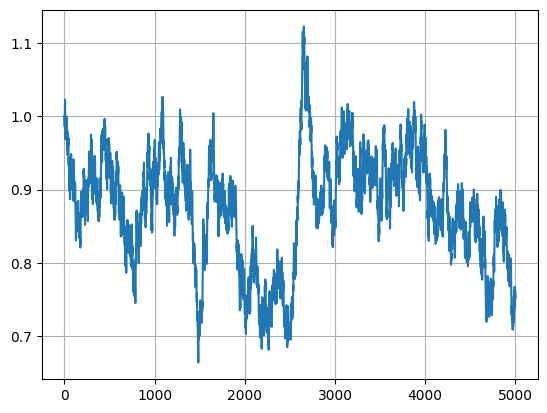

In [3]:
# сигмоидная функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

# производная сигмоидной функции потерь по вектору w
def df(w, x, y):
    L1 = 0
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y + L1 * np.sign(w)

# обучающая выборка с тремя признаками (третий - константа +1)
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [10*x[0], 10*x[1], 5*(x[0]+x[1])] for x in x_train]
x_train = np.array(x_train)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

fn = len(x_train[0])
n_train = len(x_train)  # размер обучающей выборки
w = np.zeros(fn)        # начальные весовые коэффициенты
nt = 0.00001             # шаг сходимости SGD
lm = 0.01               # скорость "забывания" для Q
N = 5000                 # число итераций SGD

Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)])  # показатель качества
Q_plot = [Q]

for i in range(N):
    k = np.random.randint(0, n_train - 1)       # случайный индекс
    ek = loss(w, x_train[k], y_train[k])        # вычисление потерь для выбранного вектора
    w = w - nt * df(w, x_train[k], y_train[k])  # корректировка весов по SGD
    Q = lm * ek + (1 - lm) * Q                  # пересчет показателя качества
    Q_plot.append(Q)

Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)]) # истинное значение эмпирического риска после обучения
print(w)
print(Q)

plt.plot(Q_plot)
plt.grid(True)
plt.show()